In [1]:
library(TDA)
library(repr)
library(stringr)
library("scatterplot3d")

#### Setup Ripser

In [2]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/labmember/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

#### Synthetic Data: Points on a circle

In [3]:
X <- circleUnif(n = 15)

#### Compute Vietoris-Rips and Alpha complexes

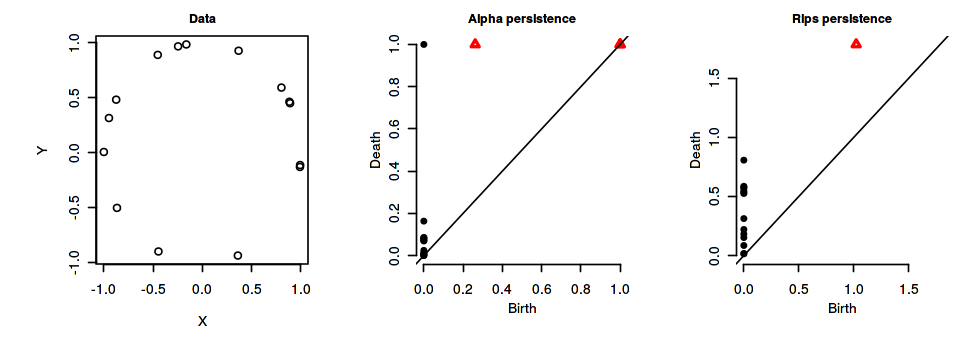

In [4]:
DiagAlphaCmplx = alphaComplexDiag(X, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(X, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(X, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

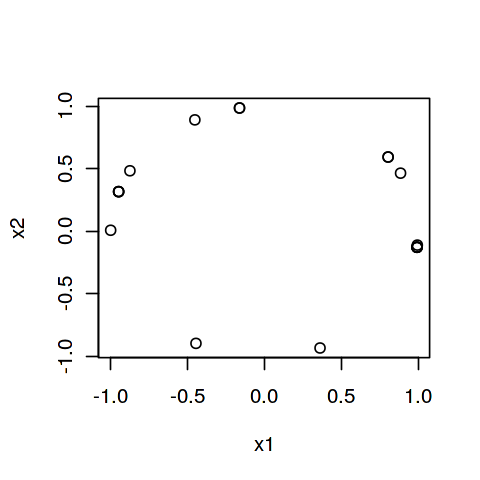

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [6]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 18

In [7]:
str(DiagAlphaCmplx$cycleLocation)

List of 18
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] 0.361 0.992 -0.932 -0.127
 $ : num [1:2, 1, 1:2] 0.994 0.992 -0.11 -0.127
 $ : num [1:2, 1, 1:2] 0.804 0.994 0.595 -0.11
 $ : num [1:2, 1, 1:2] -0.948 0.804 0.318 0.595
 $ : num [1:2, 1, 1:2] -0.875 -0.948 0.485 0.318
 $ : num [1:2, 1, 1:2] -0.99996 -0.94815 0.00912 0.31782
 $ : num [1:2, 1, 1:2] -0.162 0.804 0.987 0.595
 $ : num [1:2, 1, 1:2] 0.885 0.804 0.466 0.595
 $ : num [1:2, 1, 1:2] 0.892 0.885 0.453 0.466
 $ : num [1:2, 1, 1:2] 0.369 -0.162 0.929 0.987
 $ : num [1:2, 1, 1:2] -0.452 -0.162 0.892 0.987
 $ : num [1:2, 1, 1:2] -0.44533 -0.99996 -0.89536 0.00912
 $ : num [1:2, 1, 1:2] -0.86658 -0.99996 -0.49905 0.00912
 $ : num [1:2, 1, 1:2] -0.246 -0.162 0.969 0.987
 $ : num [1:15, 1:2, 1:2] 0.992 0.361 -0.875 -0.445 0.994 ...
 $ : num [1:8, 1:2, 1:2] 0.992 0.992 0.361 -0.875 -0.445 ...
 $ : num [1:5, 1:2, 1:2] -0.875 0.992 0.992 0.361 -0.875 ...


In [8]:
DiagAlphaCmplx

$diagram
      dimension     Birth        Death
 [1,]         0 0.0000000          Inf
 [2,]         0 0.0000000 1.630418e-01
 [3,]         0 0.0000000 7.607094e-05
 [4,]         0 0.0000000 8.164677e-02
 [5,]         0 0.0000000 8.600432e-02
 [6,]         0 0.0000000 8.313023e-03
 [7,]         0 0.0000000 2.449479e-02
 [8,]         0 0.0000000 7.535918e-02
 [9,]         0 0.0000000 5.803926e-03
[10,]         0 0.0000000 5.326384e-05
[11,]         0 0.0000000 7.131977e-02
[12,]         0 0.0000000 1.219568e-02
[13,]         0 0.0000000 8.362821e-02
[14,]         0 0.0000000 6.900527e-02
[15,]         0 0.0000000 1.815545e-03
[16,]         1 0.2616069 1.000000e+00
[17,]         1 1.0000000 1.000000e+00
[18,]         1 1.0000000 1.000000e+00

$birthLocation
              x1           x2
 [1,]  0.9919156 -0.126899391
 [2,]  0.3613846 -0.932416862
 [3,]  0.9939782 -0.109578034
 [4,]  0.8039624  0.594680177
 [5,] -0.9481523  0.317816371
 [6,] -0.8746753  0.484709247
 [7,] -0.9999584  0.0091

#### Plot merging events for connected components (dim 0 homology)

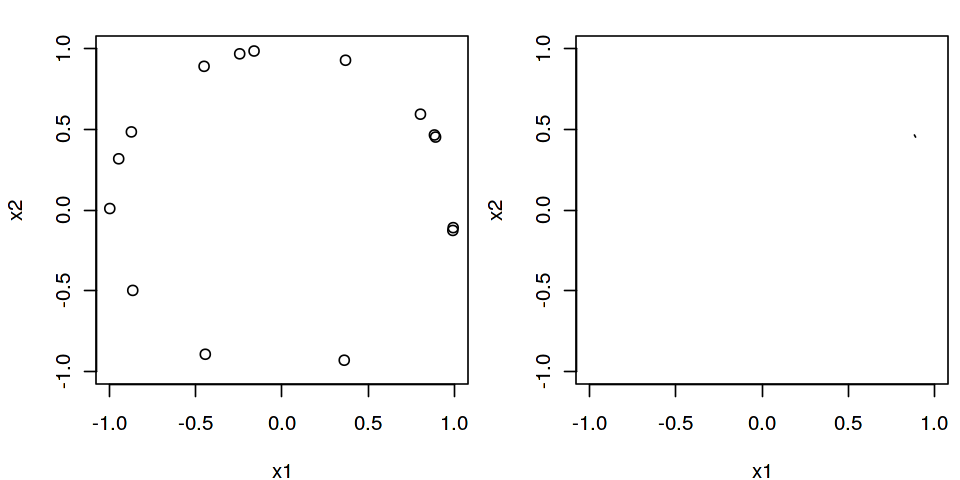

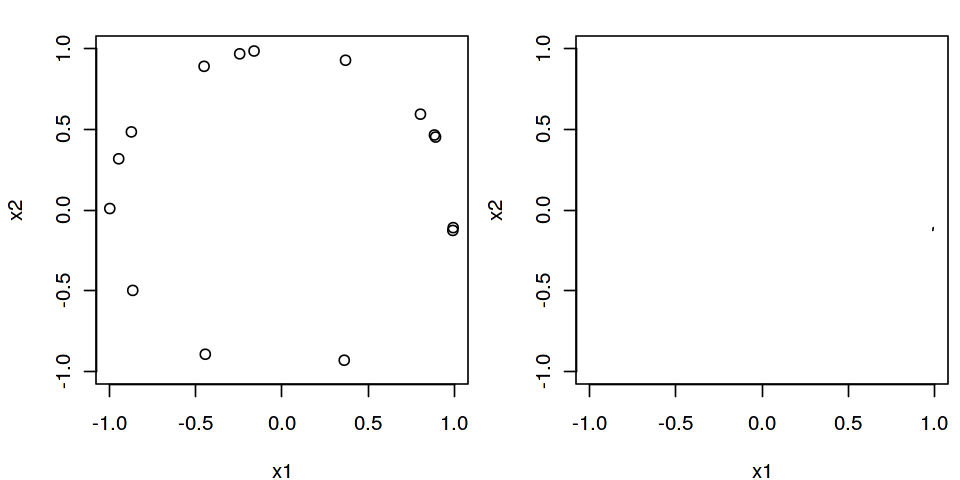

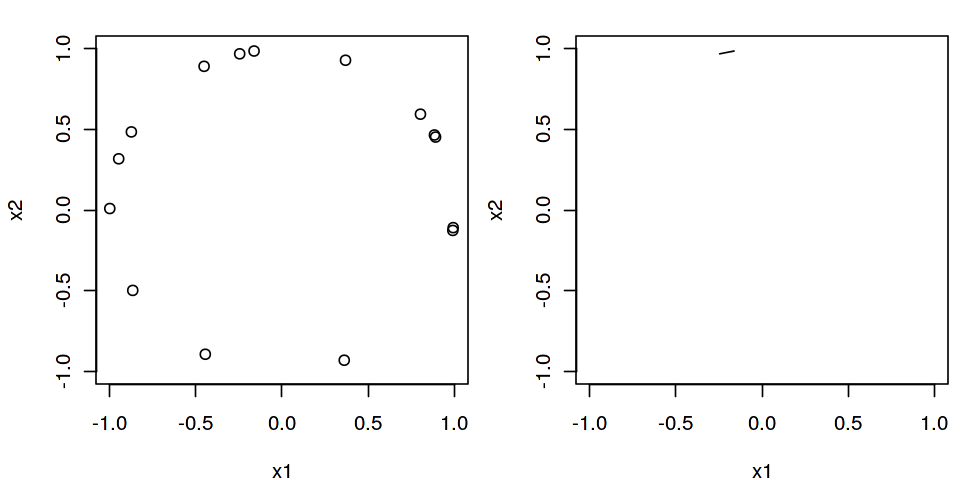

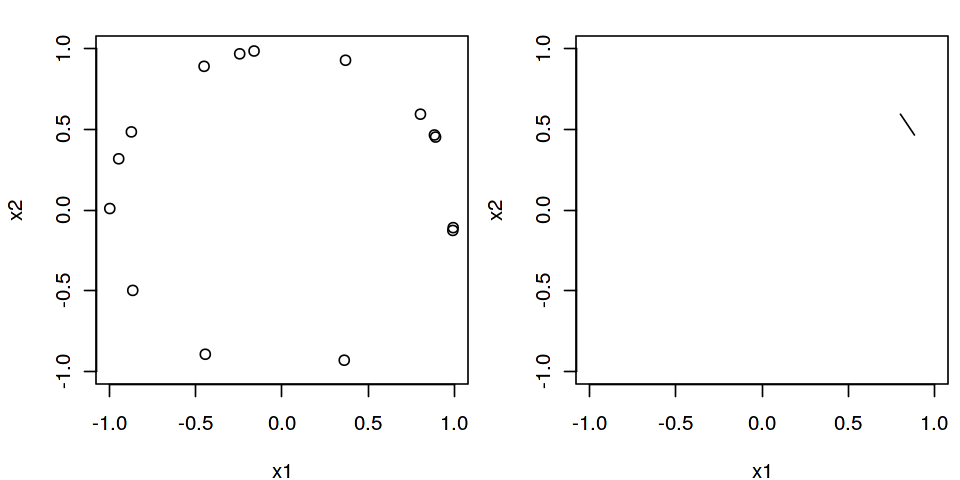

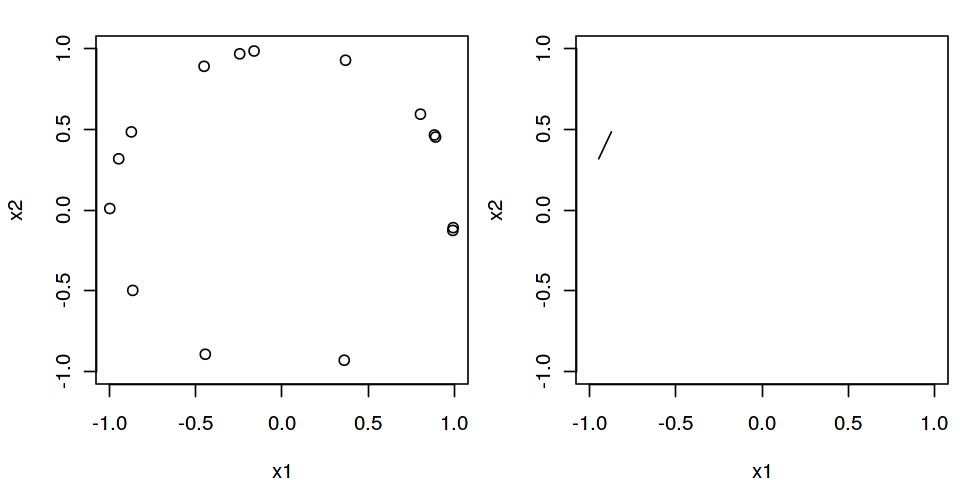

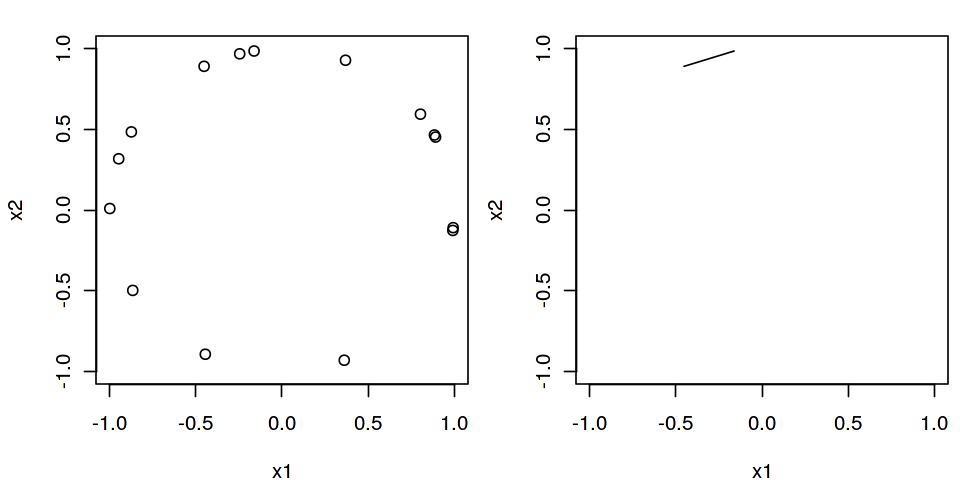

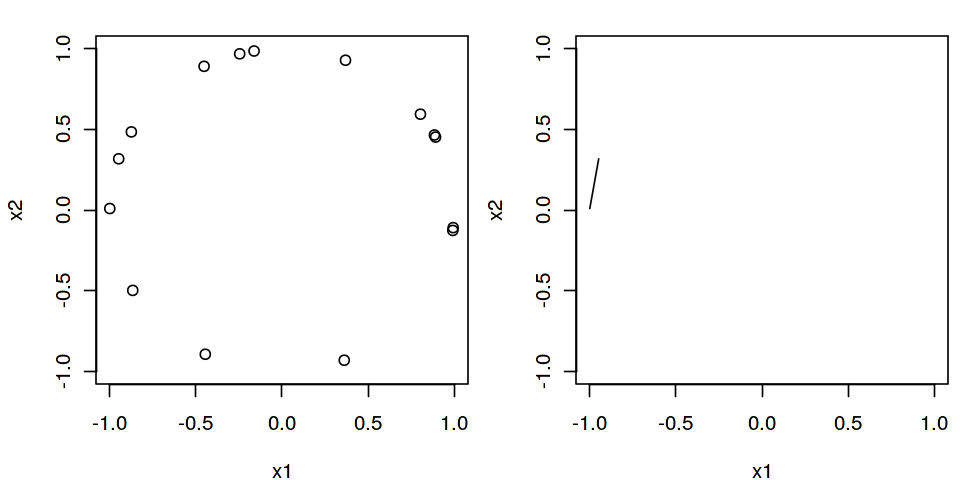

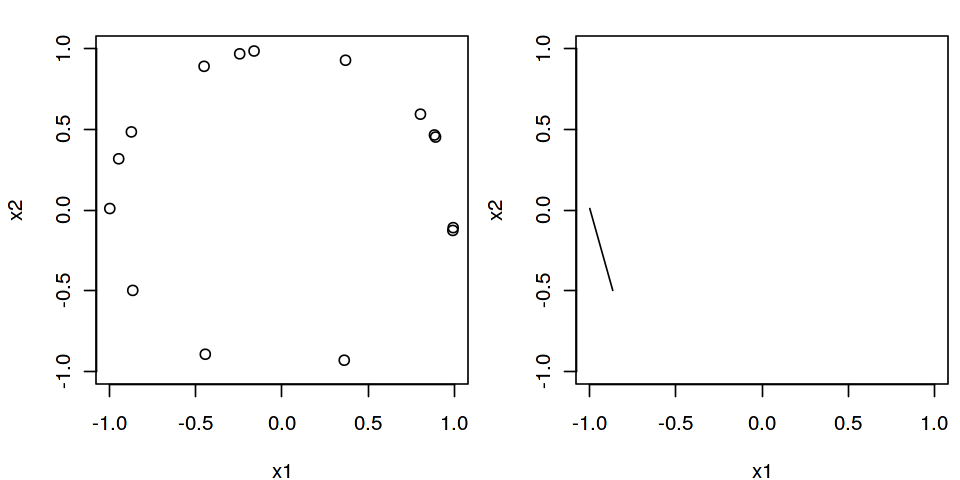

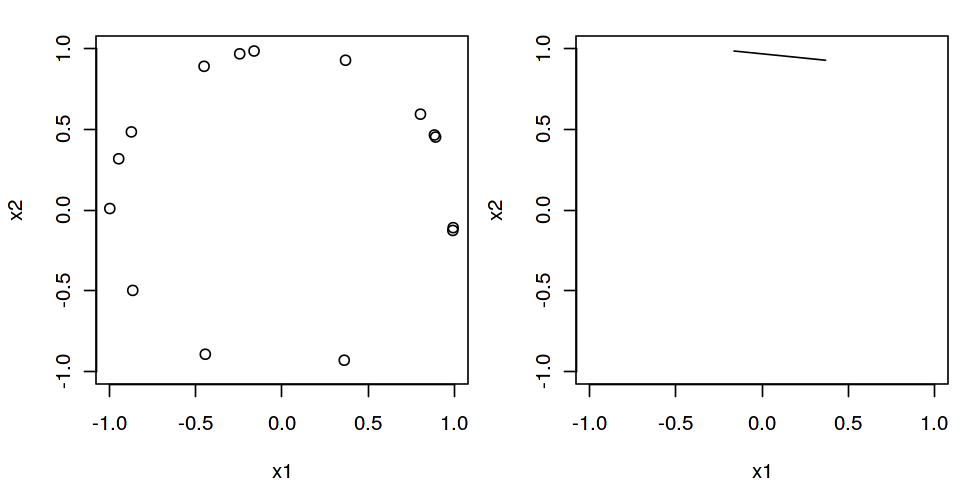

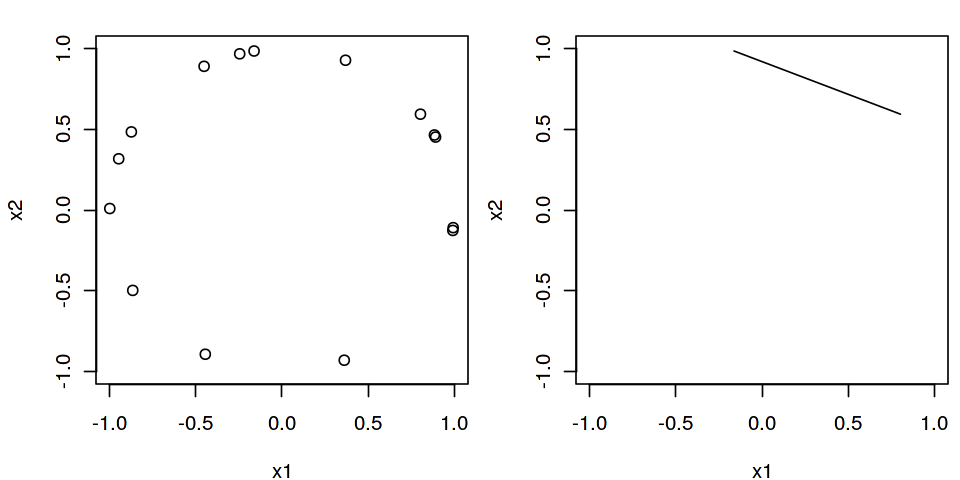

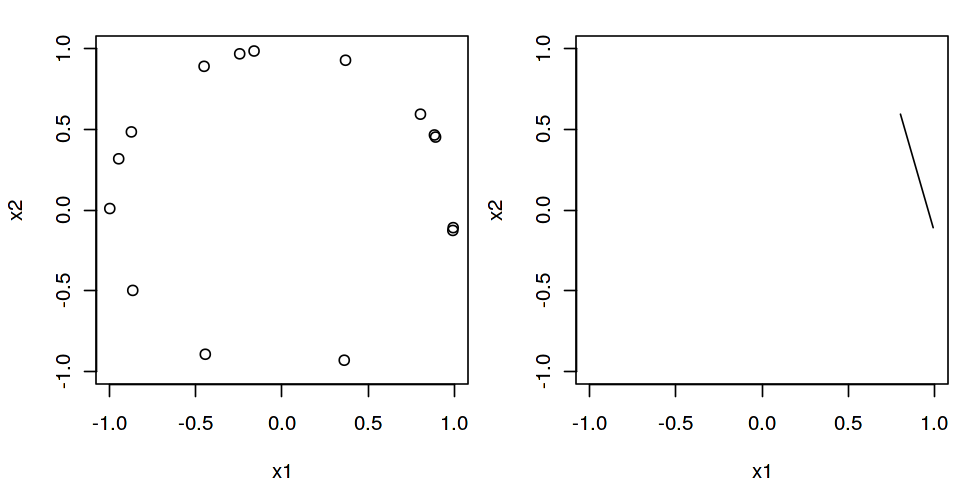

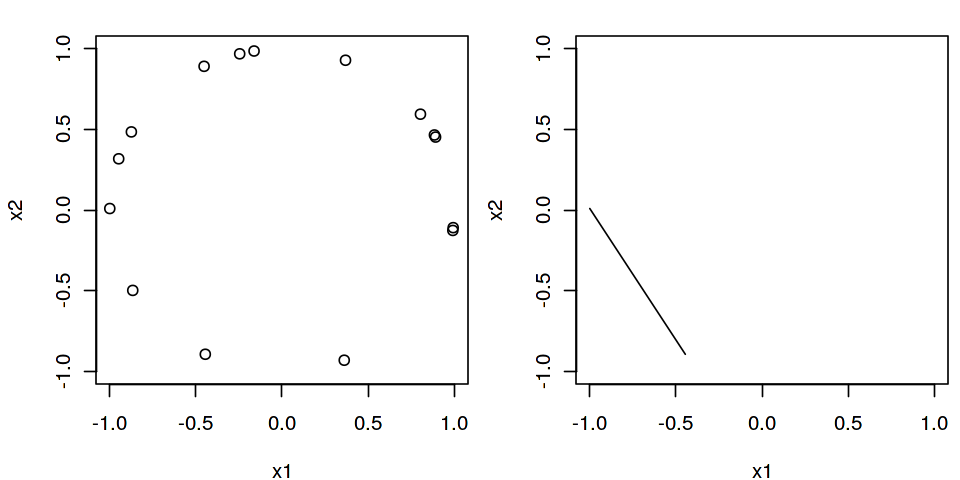

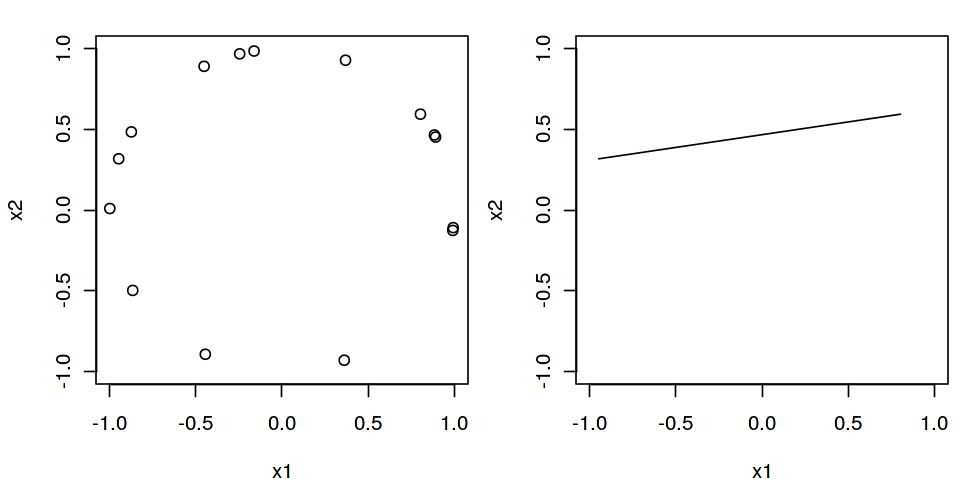

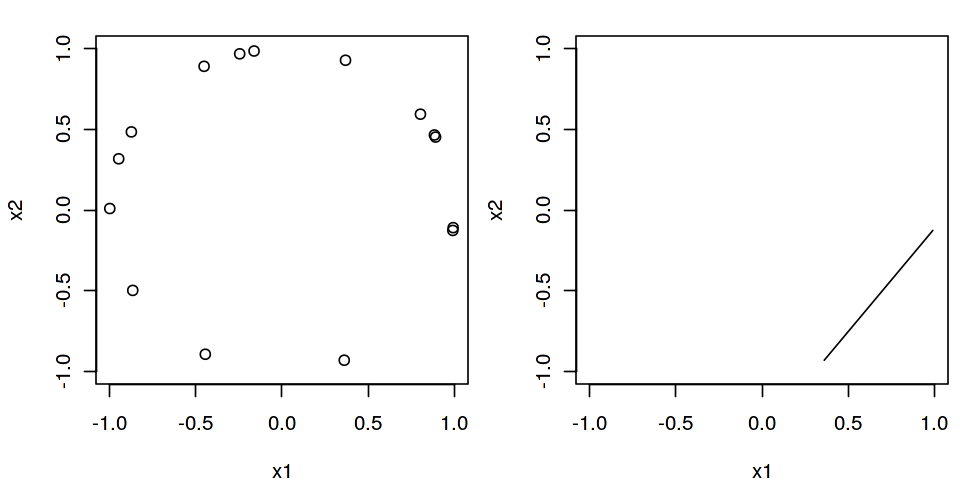

In [9]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 1){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Plot loop closing events (dim 1 homology)

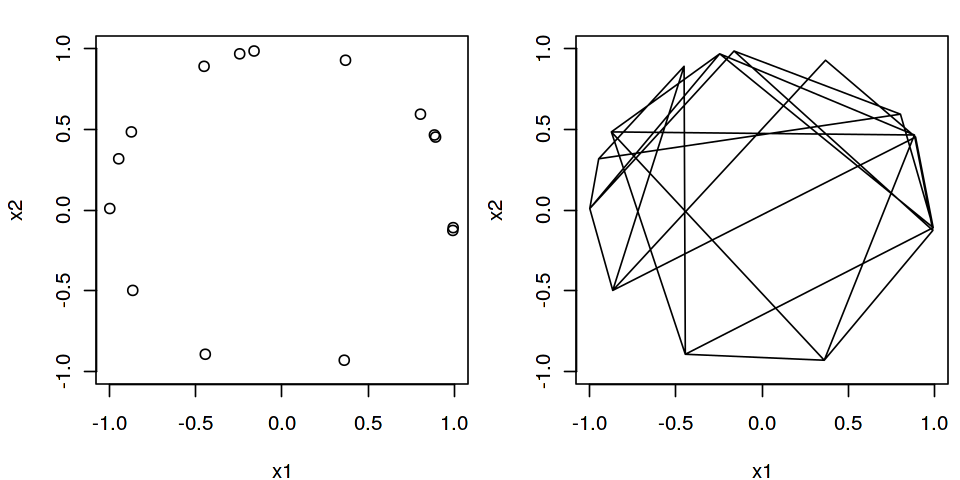

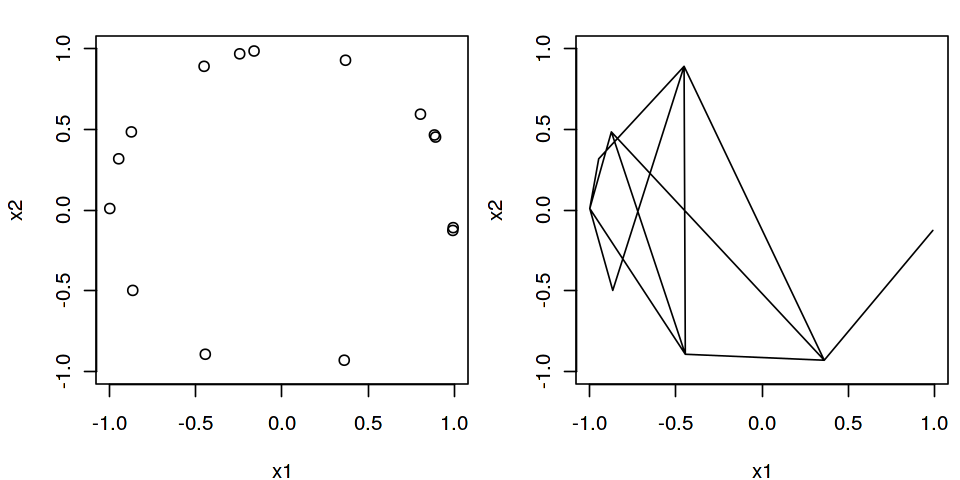

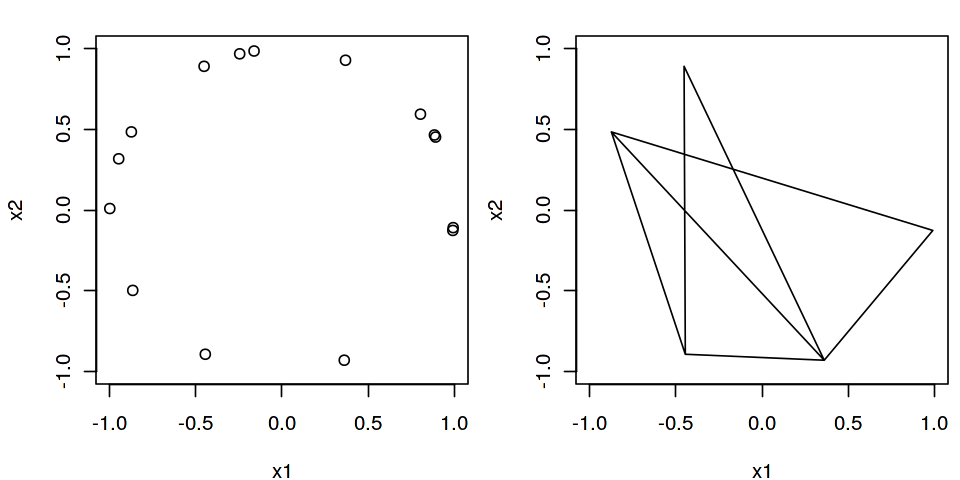

In [10]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Synthetic Data: Points located on two circles

In [11]:
Circle1 <- circleUnif(60)
Circle2 <- circleUnif(60, r = 2) + 3
Circles <- rbind(Circle1, Circle2)

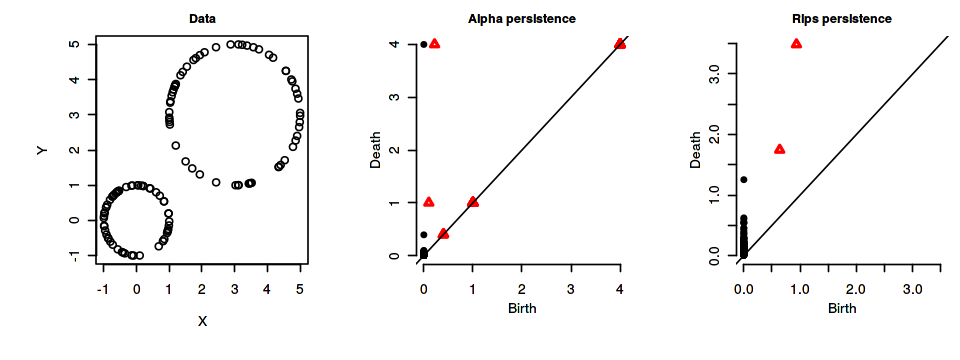

In [12]:
DiagAlphaCmplx = alphaComplexDiag(Circles, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(Circles, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

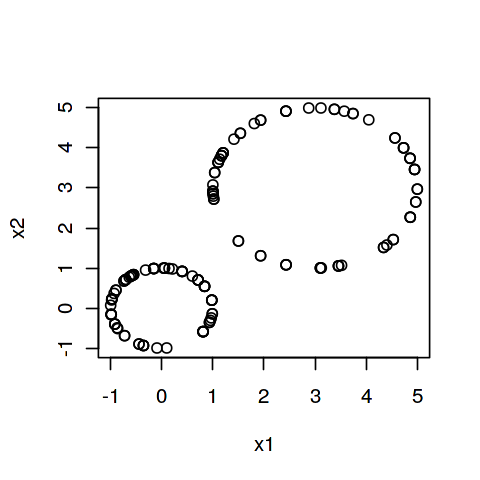

In [13]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [14]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 154

In [15]:
str(DiagAlphaCmplx$cycleLocation)

List of 154
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] -0.974 -0.154 0.228 0.988
 $ : num [1:2, 1, 1:2] -0.987 -0.974 -0.163 0.228
 $ : num [1:2, 1, 1:2] -0.989 -0.987 -0.149 -0.163
 $ : num [1:2, 1, 1:2] 0.839 -0.154 0.544 0.988
 $ : num [1:2, 1, 1:2] -0.357 -0.987 -0.934 -0.163
 $ : num [1:2, 1, 1:2] 0.0988 -0.3566 -0.9951 -0.9343
 $ : num [1:2, 1, 1:2] -0.725 -0.987 -0.688 -0.163
 $ : num [1:2, 1, 1:2] 0.0533 -0.1544 0.9986 0.988
 $ : num [1:2, 1, 1:2] -0.577 -0.974 0.817 0.228
 $ : num [1:2, 1, 1:2] 0.99 0.839 -0.142 0.544
 $ : num [1:2, 1, 1:2] 0.98 0.99 0.198 -0.142
 $ : num [1:2, 1, 1:2] 0.9997 0.9899 -0.0259 -0.1416
 $ : num [1:2, 1, 1:2] 0.809 0.99 -0.588 -0.142
 $ : num [1:2, 1, 1:2] -0.917 -0.725 -0.4 -0.688
 $ : num [1:2, 1, 1:2] -0.736 -0.577 0.677 0.817
 $ : num [1:2, 1, 1:2] 0.813 0.809 -0.582 -0.588
 $ : num [1:2, 1, 1:2] -0.315 -0.154 0.949 0.988
 $ : num [1:2, 1, 1:2] 0.98 0.98 0.199 0.198
 $ : num [1:2, 1, 1:2] 0.934 0.99 -0.356 -0.142
 $ : num [1:2, 1, 1:2] -0.89

In [16]:
DiagAlphaCmplx

$diagram
       dimension     Birth        Death
  [1,]         0 0.0000000          Inf
  [2,]         0 0.0000000 1.440205e-02
  [3,]         0 0.0000000 1.211088e-02
  [4,]         0 0.0000000 4.705255e-05
  [5,]         0 0.0000000 1.046190e-02
  [6,]         0 0.0000000 1.010540e-02
  [7,]         0 0.0000000 1.183242e-02
  [8,]         0 0.0000000 3.927330e-03
  [9,]         0 0.0000000 6.120647e-03
 [10,]         0 0.0000000 6.541957e-03
 [11,]         0 0.0000000 3.372862e-02
 [12,]         0 0.0000000 1.263907e-02
 [13,]         0 0.0000000 3.372304e-03
 [14,]         0 0.0000000 9.103718e-03
 [15,]         0 0.0000000 3.297180e-03
 [16,]         0 0.0000000 1.115525e-03
 [17,]         0 0.0000000 1.428731e-05
 [18,]         0 0.0000000 6.797093e-03
 [19,]         0 0.0000000 3.884112e-07
 [20,]         0 0.0000000 2.745394e-03
 [21,]         0 0.0000000 5.309985e-03
 [22,]         0 0.0000000 7.077364e-04
 [23,]         0 0.0000000 9.110193e-03
 [24,]         0 0.0000000 7.94

#### Plot loop closing events

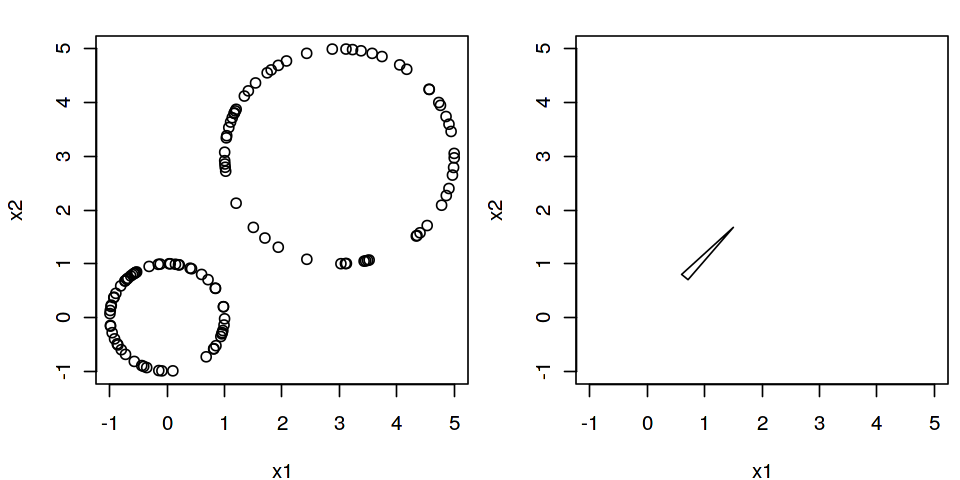

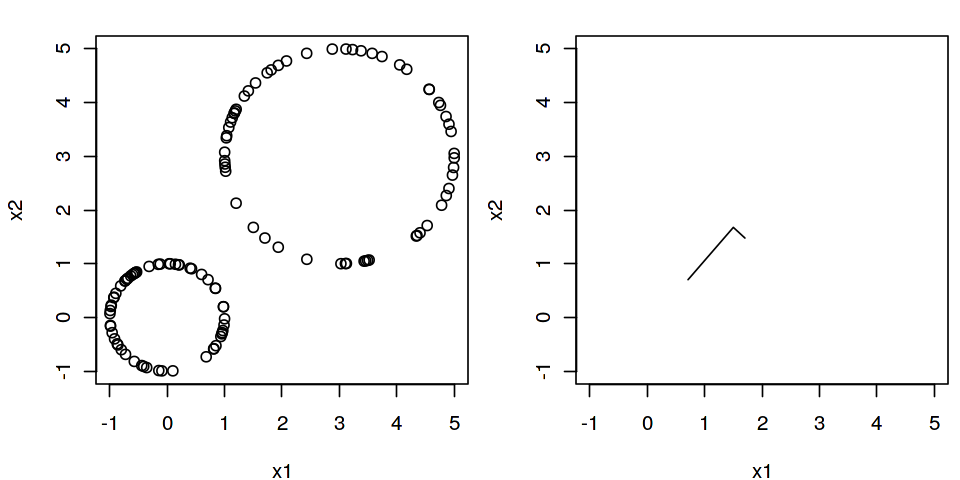

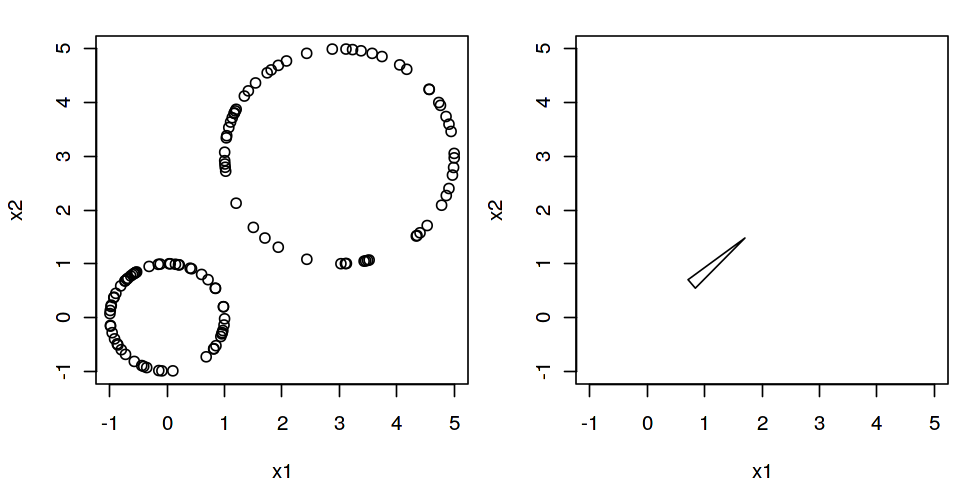

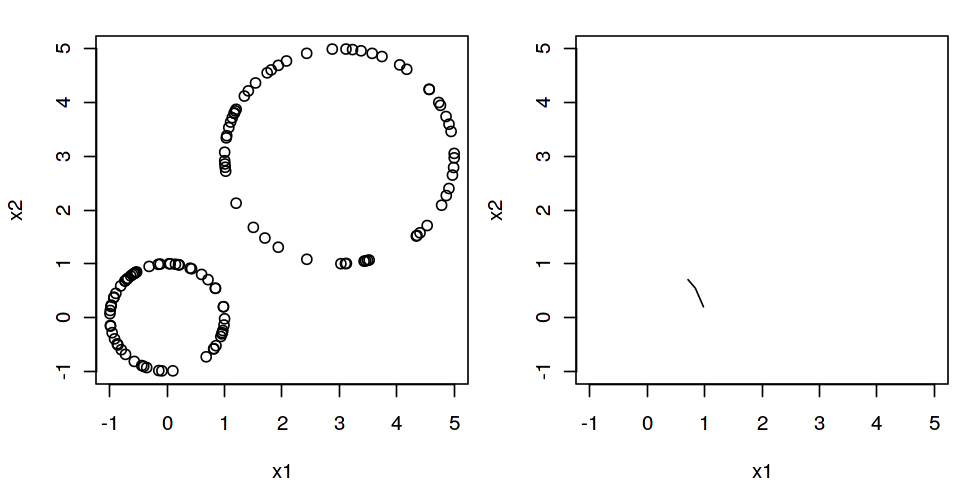

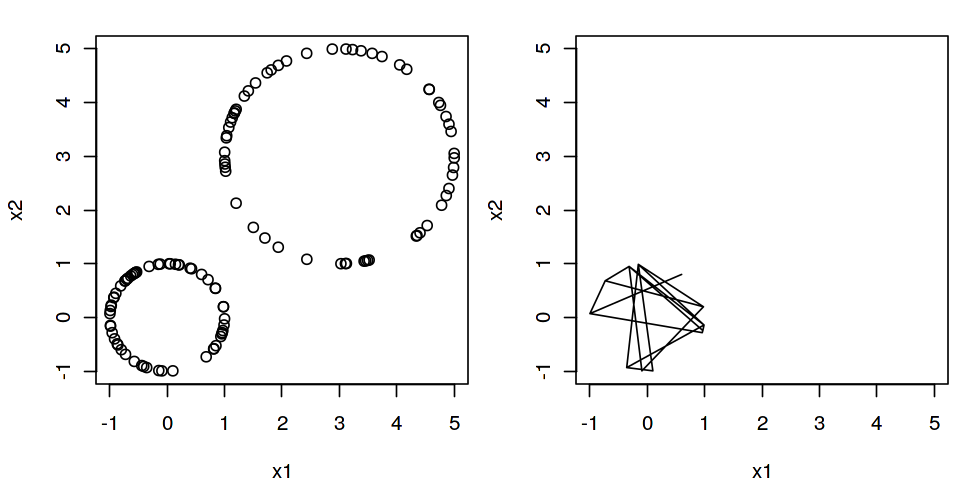

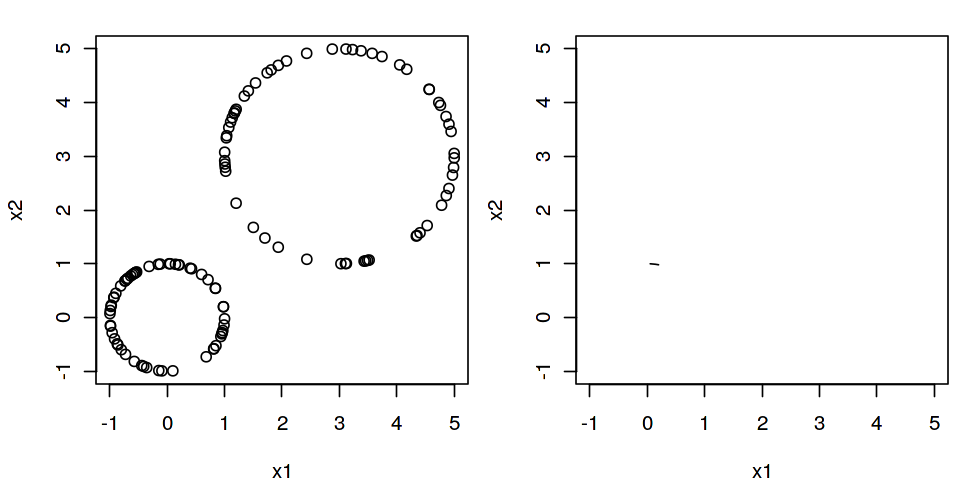

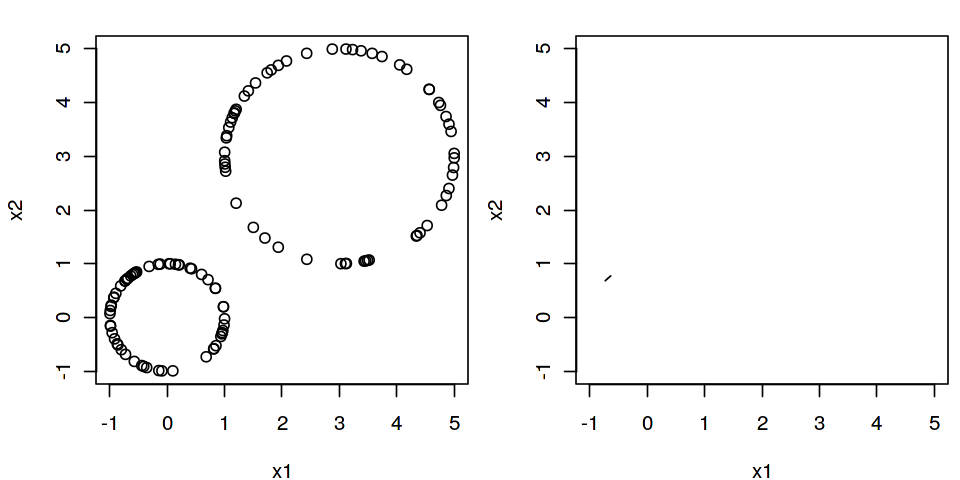

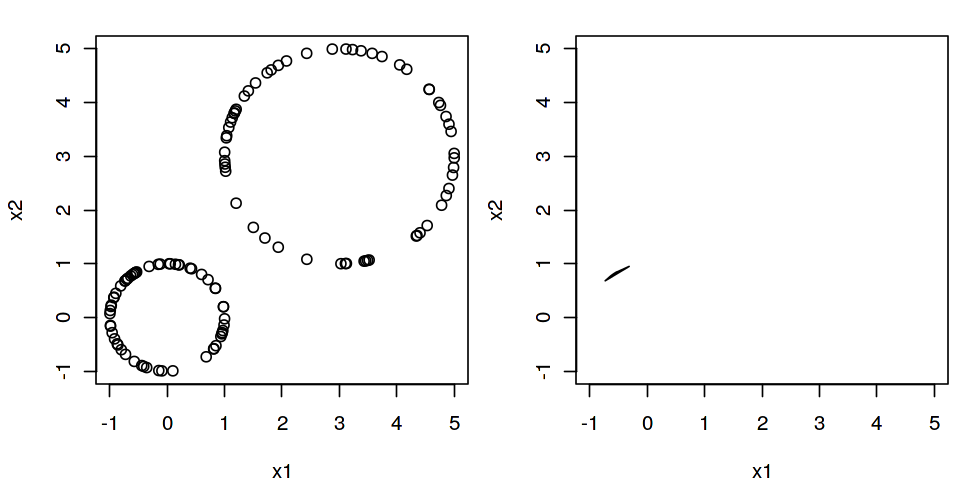

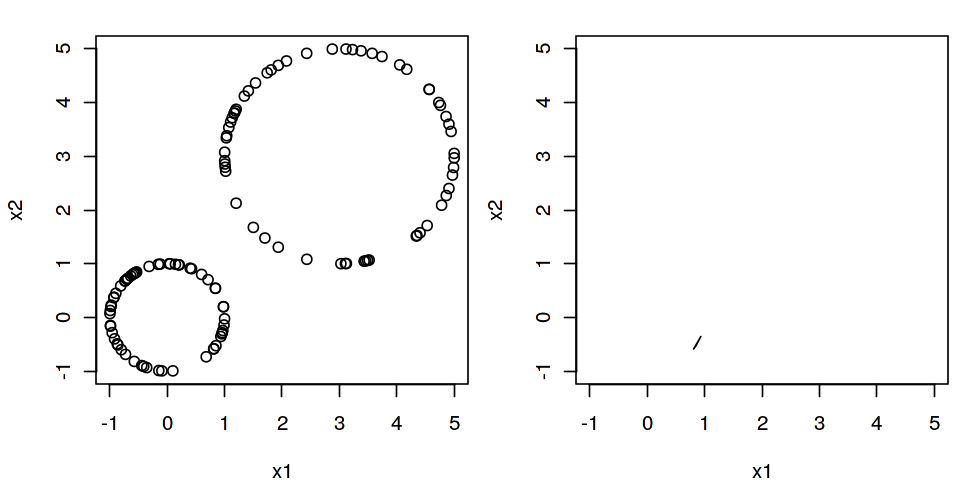

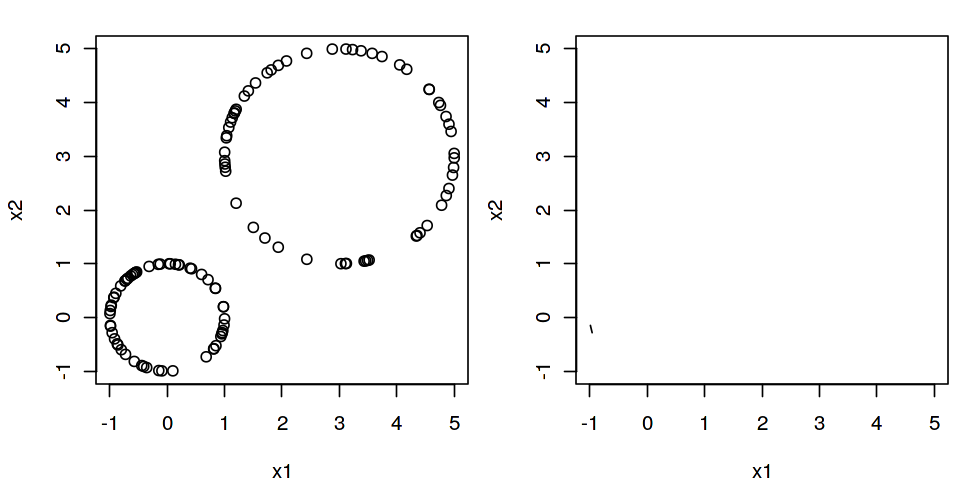

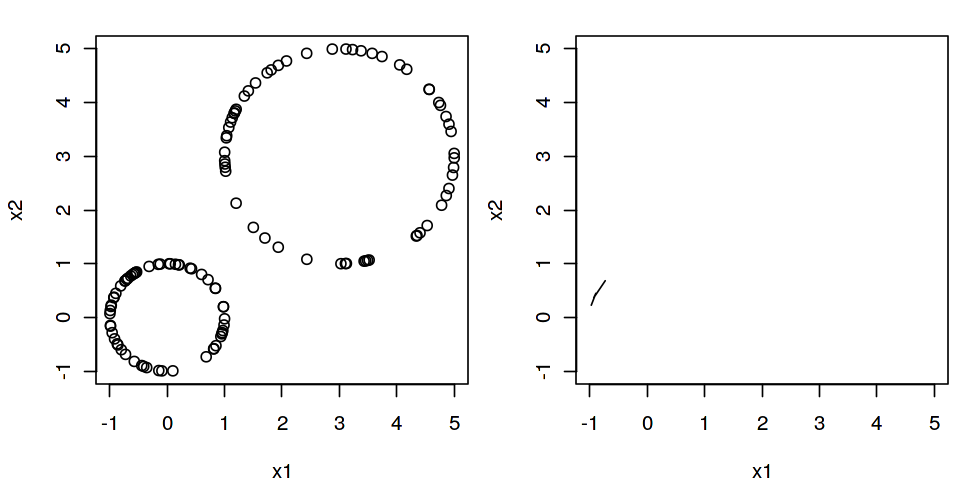

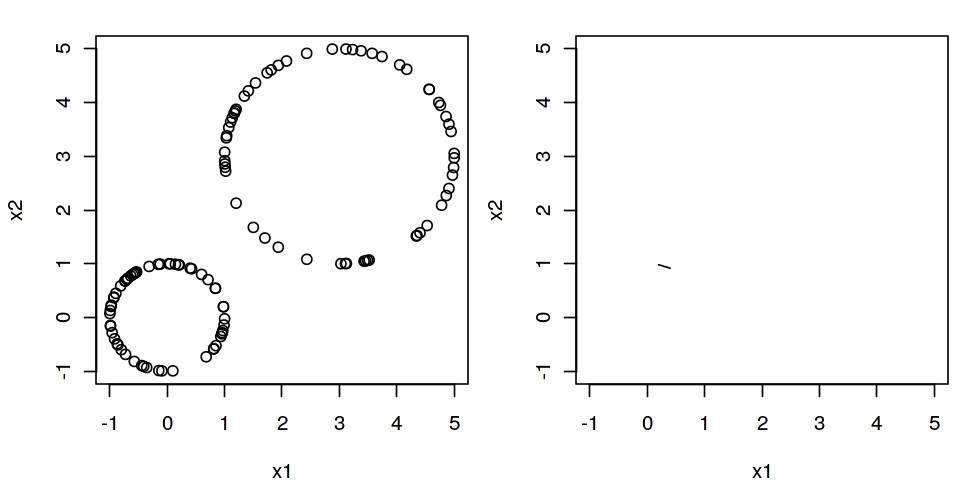

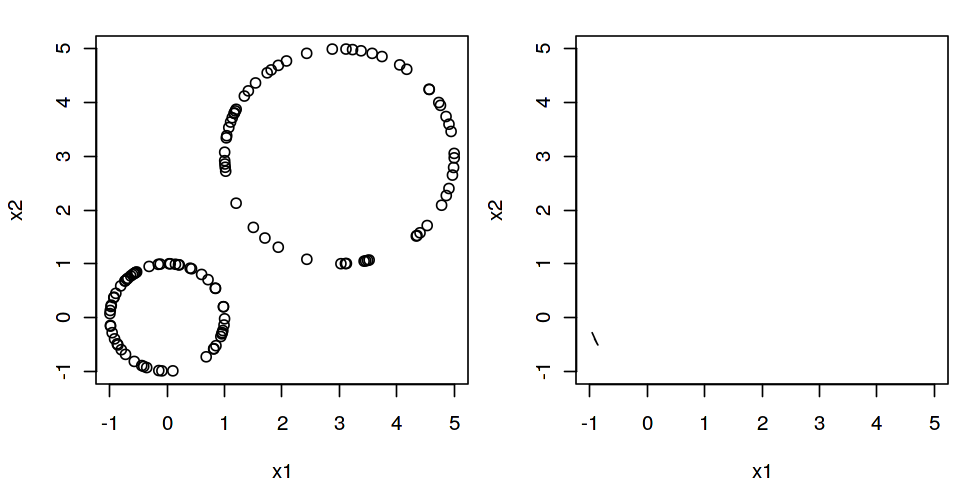

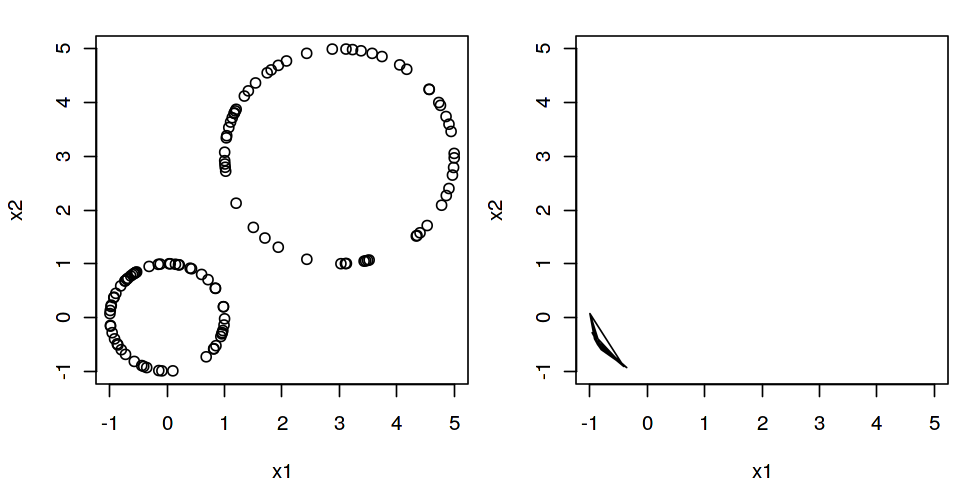

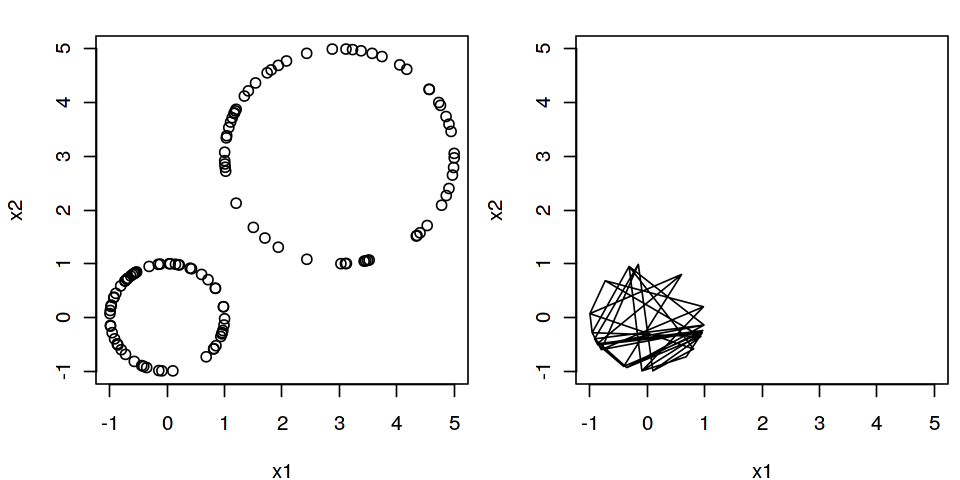

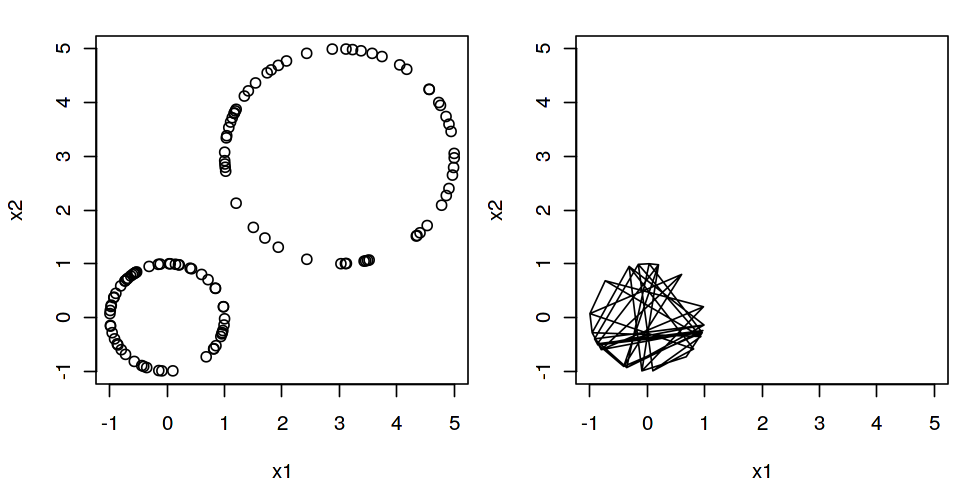

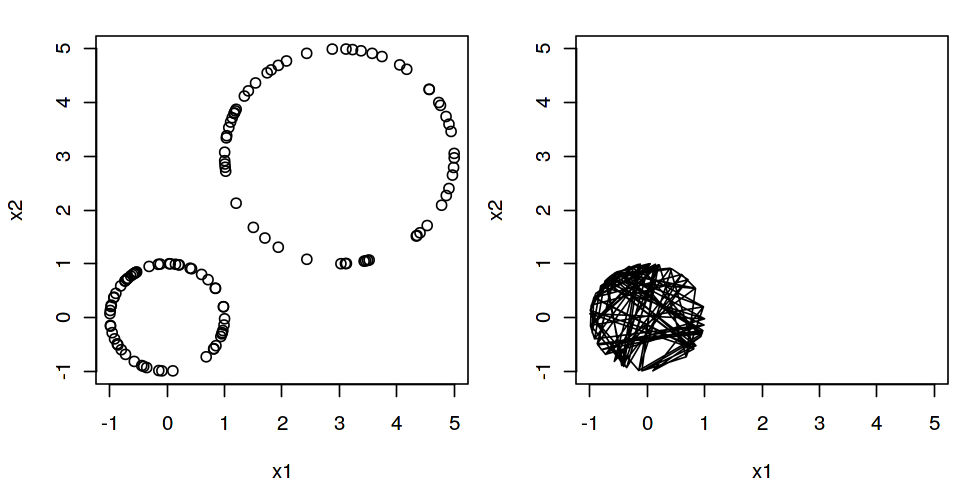

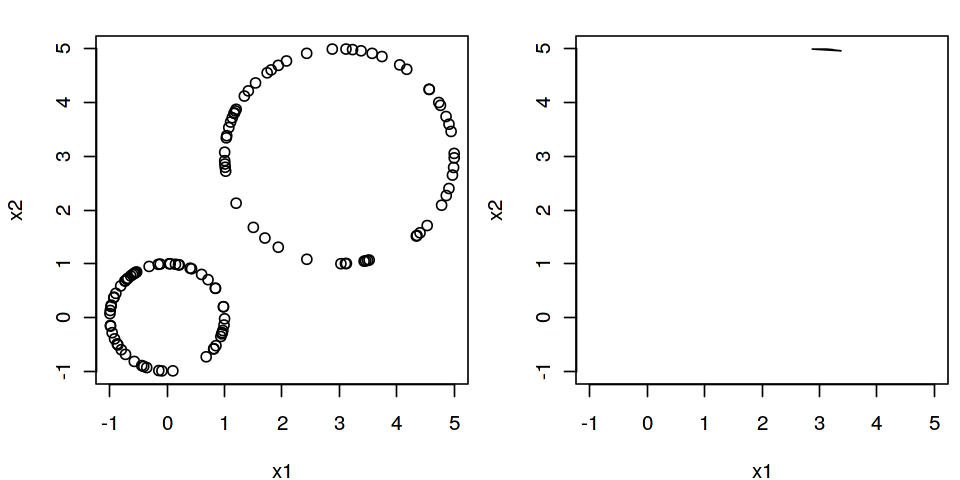

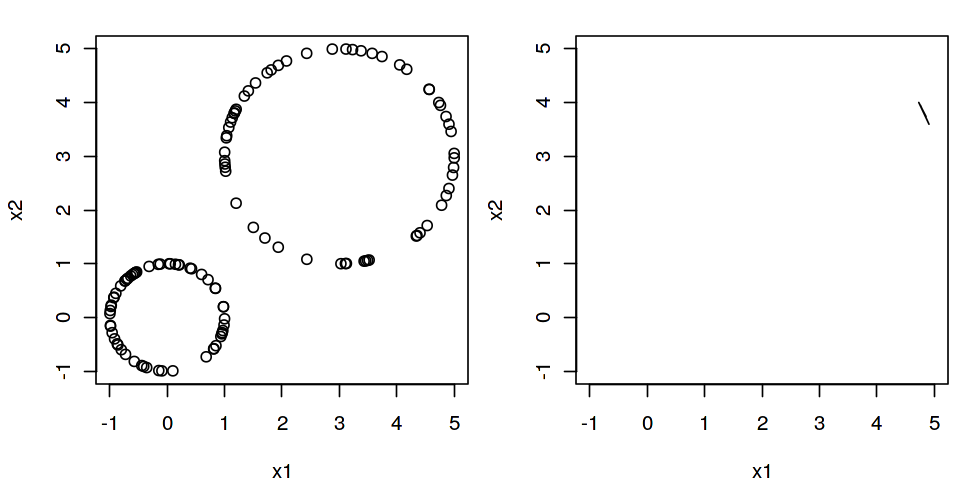

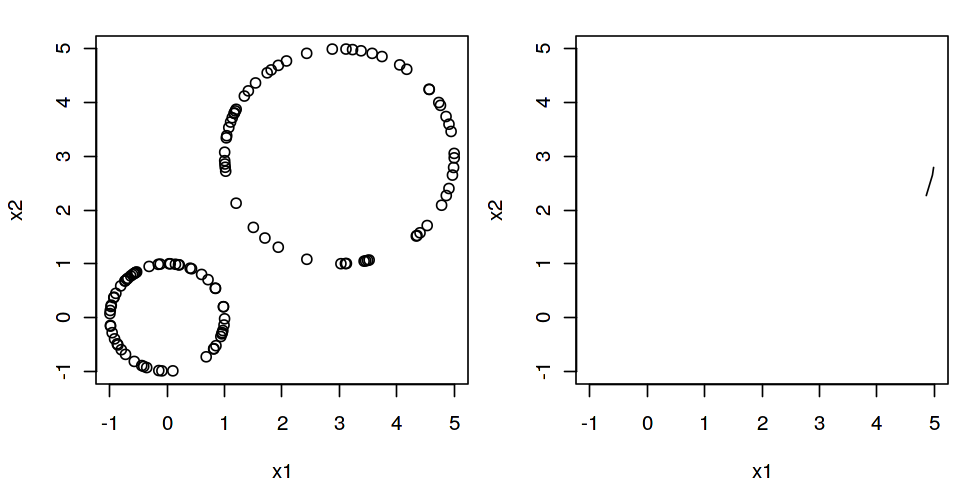

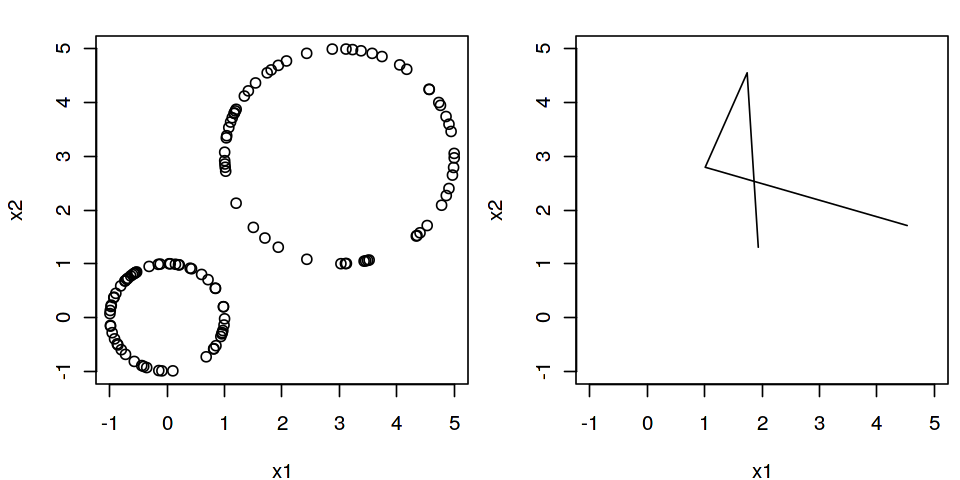

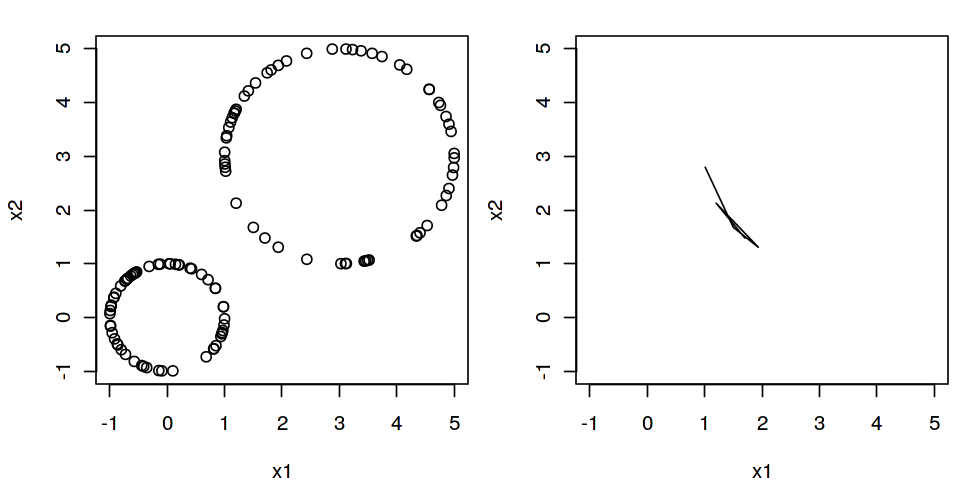

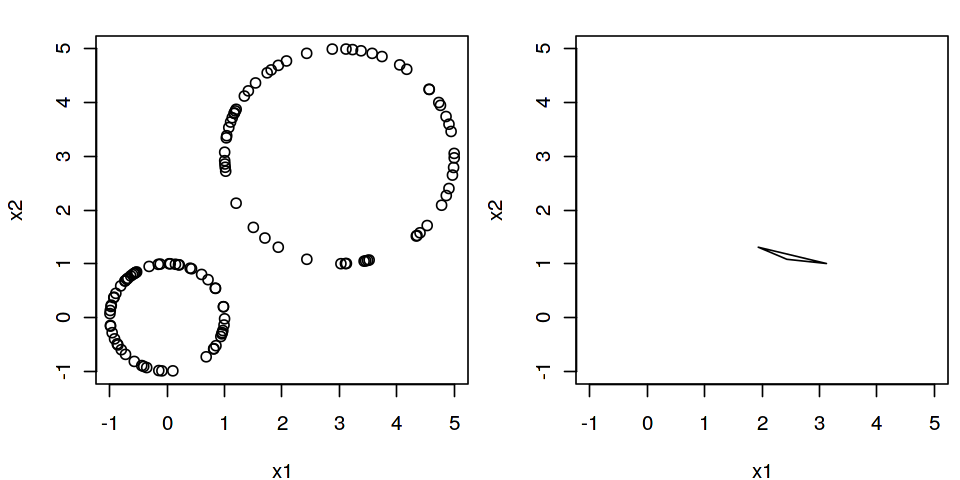

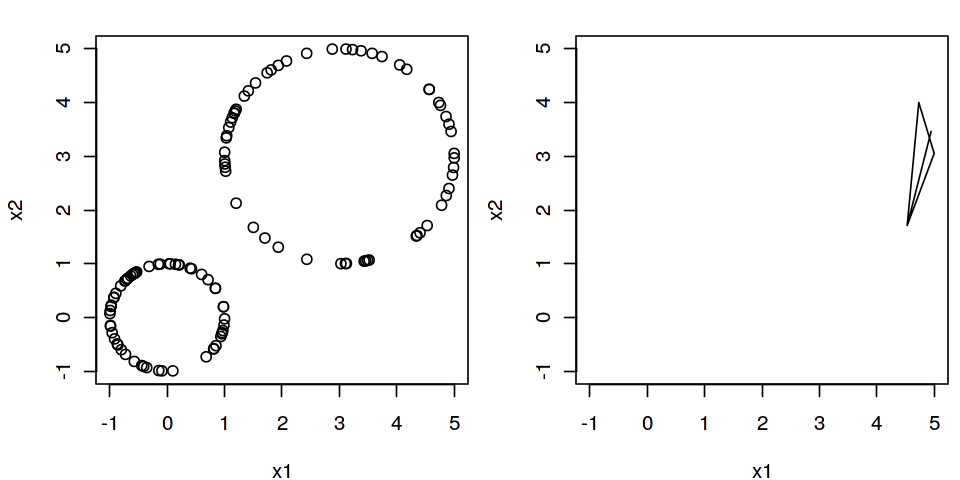

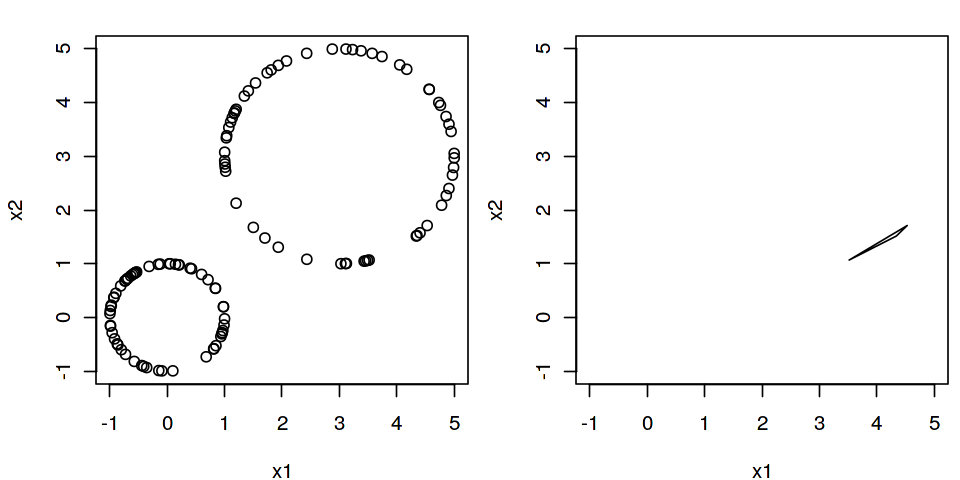

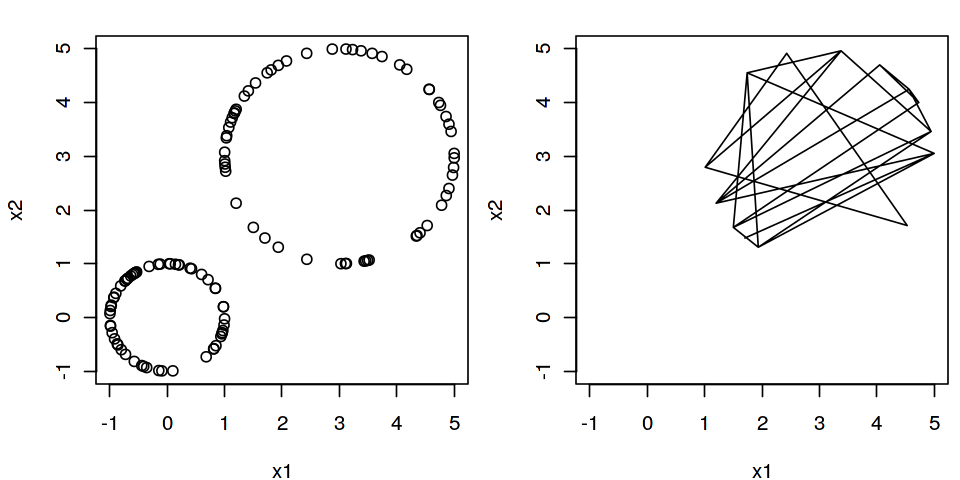

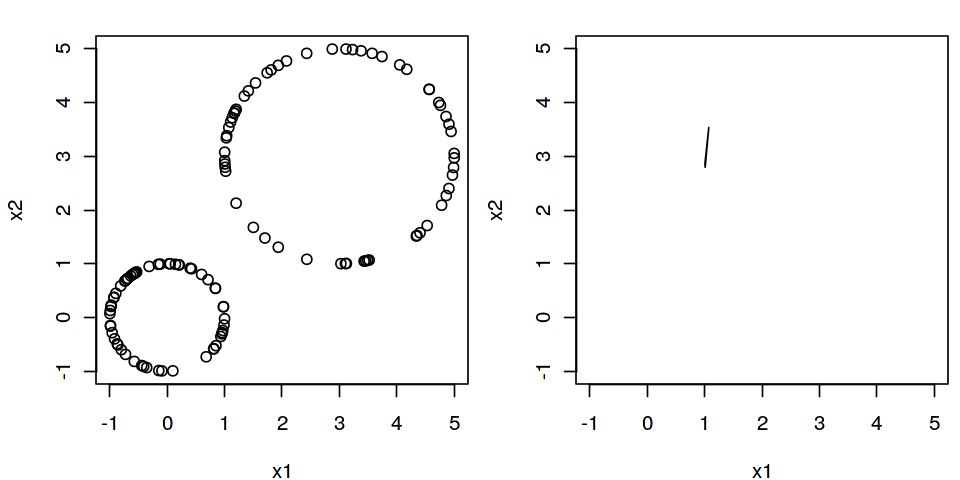

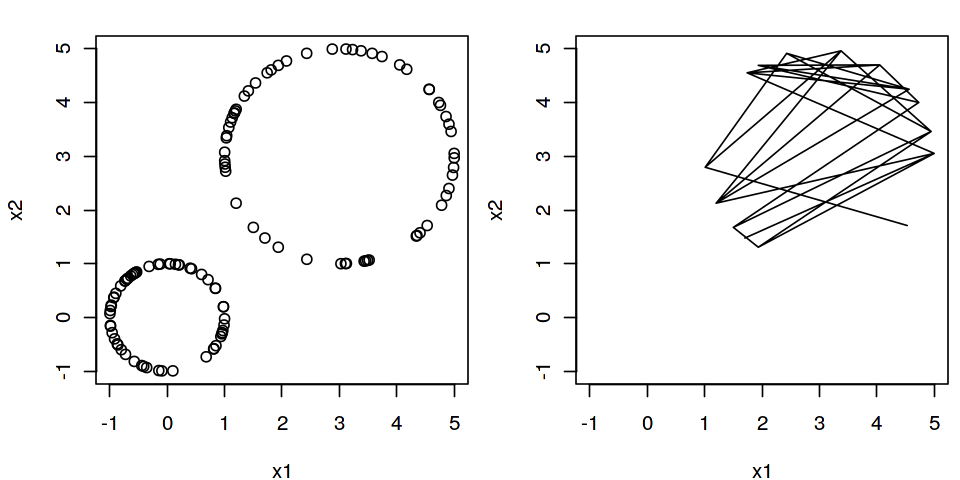

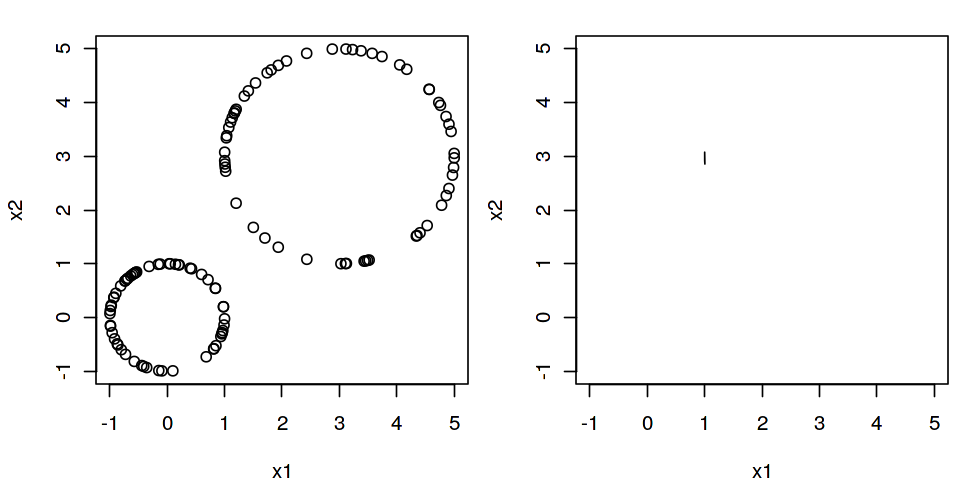

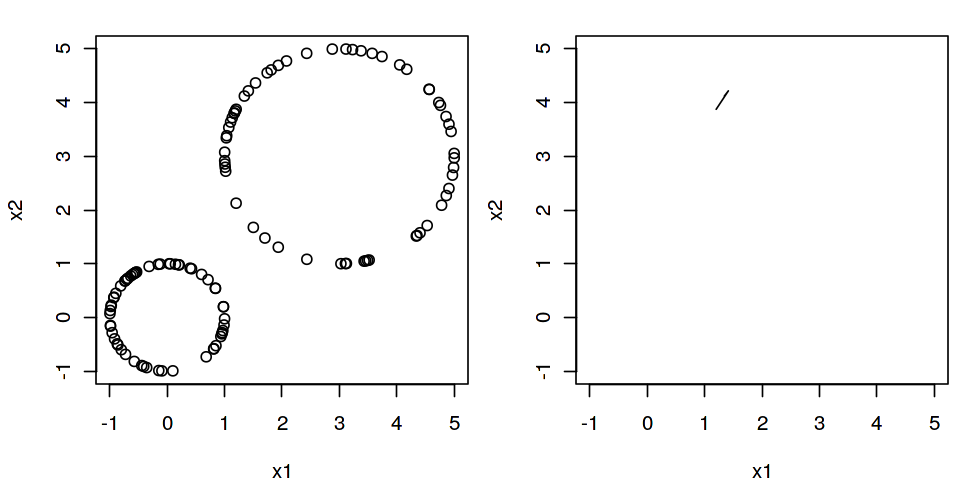

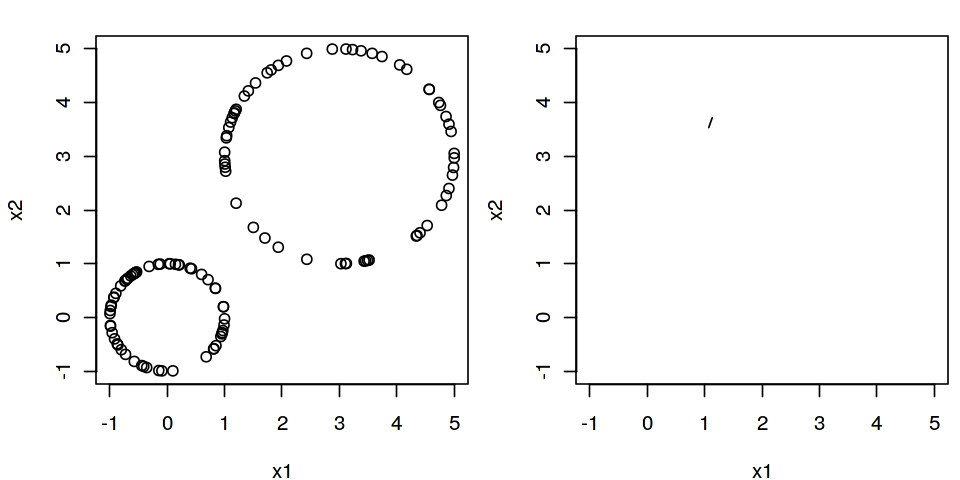

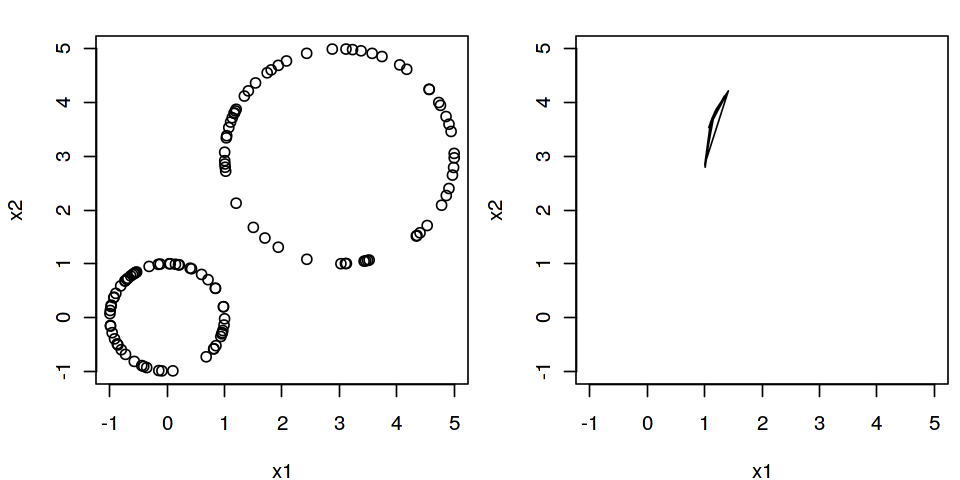

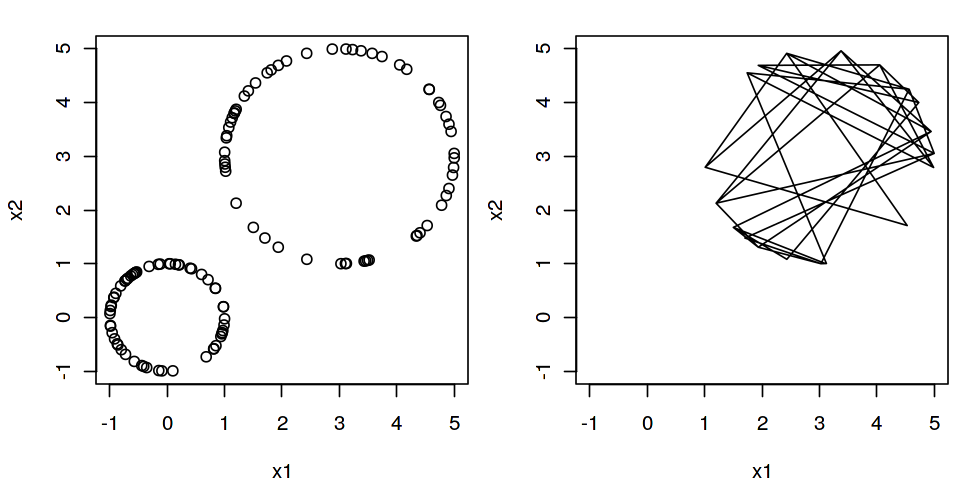

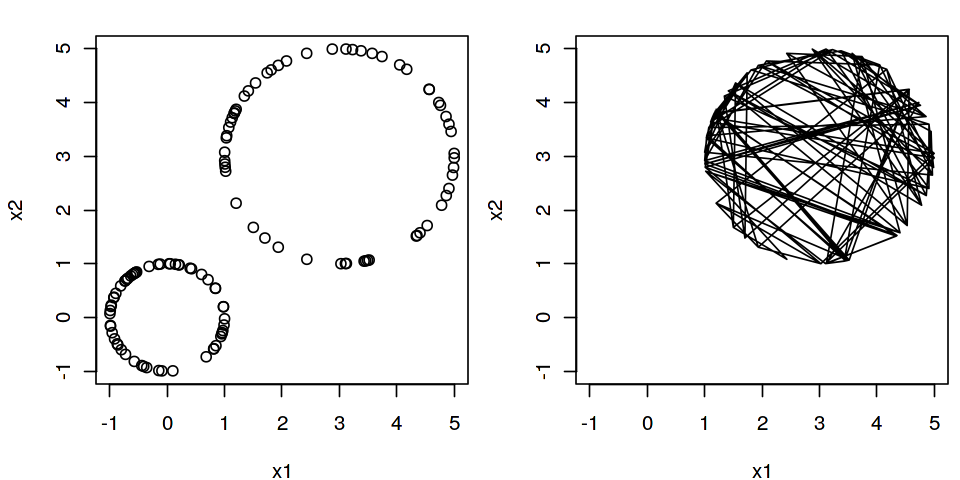

In [17]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(Circles, xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
    }
    
}

x.hull,y.hull
4.52904332,1.71080392
4.40422121,1.57586420
4.35137022,1.52561927
4.33966297,1.51497370
0.67963483,-0.73355061
0.09878842,-0.99510846
-0.09210517,-0.99574928
-0.14608123,-0.98927260
-0.35656723,-0.93426967
-0.40865543,-0.91268874


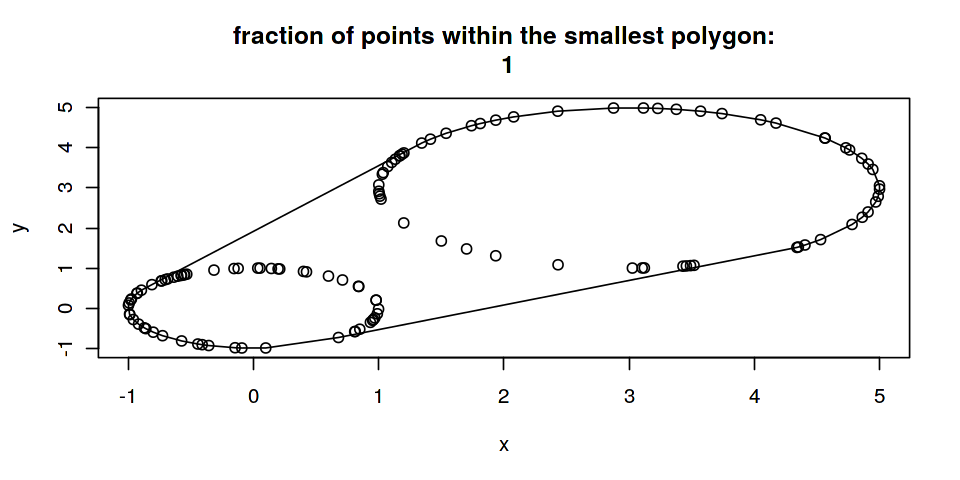

In [19]:
library(aplpack)
#options(repr.plot.width=3, repr.plot.height=3)
#plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plothulls(Circles)

#### Rips filtration
- The following function computes the subset of the rips barcode based on epsilon duration present
- Intake is the output format from ripser and a filtration length value gamma

In [28]:
duration_filter = function(rips_homology,gamma){
    rips_duration = rips_homology[,3]-rips_homology[,2]
    rips_homology2 = cbind(rips_homology,rips_duration)
    g = rips_homology2[,4]>gamma
    rips_homology2 = rips_homology2[g,]
    return(rips_homology2)
}

In [29]:
rip_check = duration_filter(rips_homology,0.5)
print(rip_check)

     dimension   Birth    Death rips_duration
[1,]         0 0.00000 0.538393      0.538393
[2,]         0 0.00000 0.541185      0.541185
[3,]         0 0.00000 0.545994      0.545994
[4,]         0 0.00000 0.599138      0.599138
[5,]         0 0.00000 0.622512      0.622512
[6,]         0 0.00000 1.253340      1.253340
[7,]         1 0.93483 3.487120      2.552290
[8,]         1 0.63702 1.744900      1.107880


#### Rips Computation AND Filtration

In [30]:
compute_rips = function(data,maxDim,epsThresh,gamma){
    homology_data = ripserDiag(data,maxDim,epsThresh)
    homology_data = duration_filter(homology_data,gamma)
    return(homology_data)
}

In [32]:
FR = compute_rips(Circles,1,10,0.5)
print(FR)

     dimension   Birth    Death rips_duration
[1,]         0 0.00000 0.538393      0.538393
[2,]         0 0.00000 0.541185      0.541185
[3,]         0 0.00000 0.545994      0.545994
[4,]         0 0.00000 0.599138      0.599138
[5,]         0 0.00000 0.622512      0.622512
[6,]         0 0.00000 1.253340      1.253340
[7,]         1 0.93483 3.487120      2.552290
[8,]         1 0.63702 1.744900      1.107880
